<a href="https://colab.research.google.com/github/juancarlosmontesdeoca/Series-Tiempo-Proyecto/blob/main/Series_Tiempo_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**_Proyecto de Series de Tiempo_**

In [1]:
# Uninstall the older versions first
!pip uninstall -y numpy pmdarima
# Install the modern versions that satisfy JAX, OpenCV, and pmdarima
# Instalamos la versión de NumPy que satisface a todos los paquetes
!pip install "numpy>=2.0,<2.1"
!pip install pmdarima

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: pmdarima 2.1.1
Uninstalling pmdarima-2.1.1:
  Successfully uninstalled pmdarima-2.1.1
  Using cached numpy-2.0.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-2.0.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.2 MB)


  Using cached pmdarima-2.1.1-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (8.5 kB)
Using cached pmdarima-2.1.1-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl (689 kB)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
from pmdarima import auto_arima

**Paso 1: Cargar la data**


In [3]:
df = pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=2546&path=sales.csv")

In [4]:
df.shape

(366, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [6]:
df.head(3)

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693


In [7]:
df.tail(3)

,date,sales
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214
365,2023-09-03 17:10:08.079328,1000.482785


**Paso 2: Construye y Analiza la Serie Temporal**

Construye la estructura de datos valida para la serie temporal, graficala, analiza y responde:

a) Cual es el tensor de la serie temporal?

b) Cual es la tendencia?

c) Es estacionaria?

d) Existe variabilidad o presencia de ruido?



In [8]:
#Transformando la variable date

df['date_time'] = pd.to_datetime(df['date']).dt.normalize()

In [9]:
df.head(3)

,date,sales,date_time
0,2022-09-03 17:10:08.079328,55.292157,2022-09-03
1,2022-09-04 17:10:08.079328,53.803211,2022-09-04
2,2022-09-05 17:10:08.079328,58.141693,2022-09-05


In [10]:
df_modif = df.drop('date',axis=1)
df_modif = df_modif.set_index('date_time')

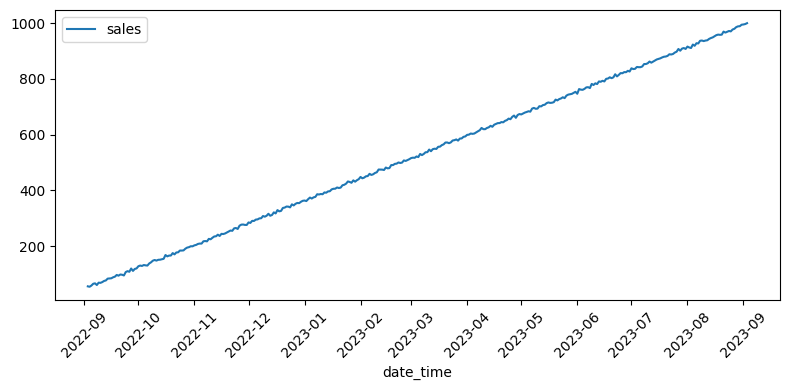

In [11]:
fig, ax = plt.subplots(figsize=(8,4))

sns.lineplot(data=df_modif, ax=ax)

# Forzar ticks mensuales
ax.xaxis.set_major_locator(mdates.MonthLocator())             # cada mes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))   # mostrar año-mes

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Tensor:

El tensor en una serie temporal es la unidad de tiempo minima para la cual hay datos, por lo tanto el tensor en el caso de estudio es diaria.

Descomposicion de la serie temporal

In [12]:
sales = df_modif['sales']

In [13]:
decompose = seasonal_decompose(sales,
                               model='additive',
                               period=7)

**Tendencia**

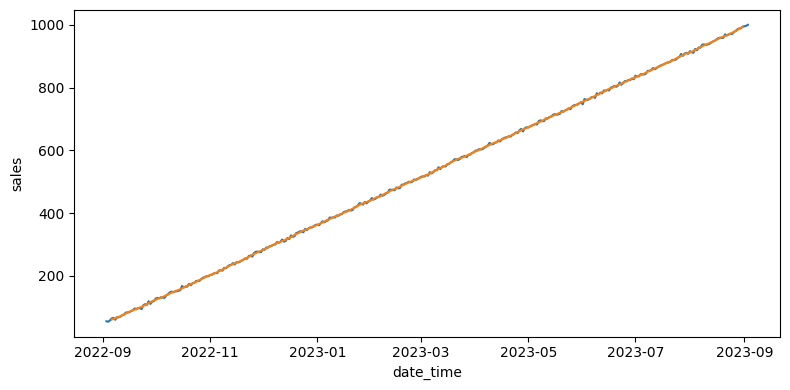

In [14]:
trend = decompose.trend

fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = sales)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

Interpretacion de la Tendencia:

Visualmente la tendencia es lineal

**Estacionalidad**

Para evaluar la estacionalidad de la serie temporal podemos aplicar la Prueba de Dickey Fuller (Dickey-Fuller Test) donde:

H0: La serie NO es estacionaria

H1: La serie es estacionaria

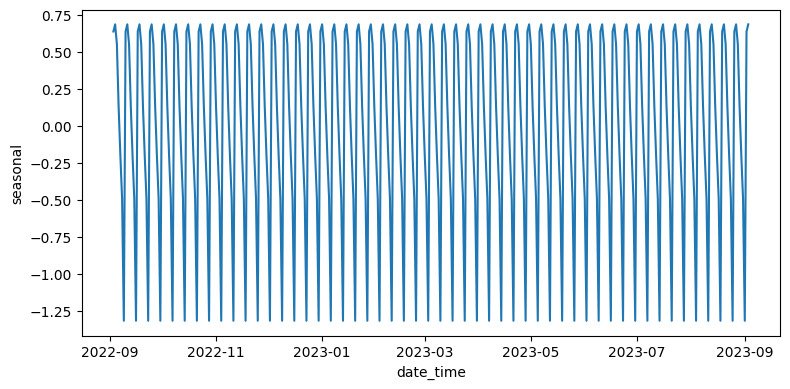

In [15]:
#Primero veamos su comportamiento graficamente

seasonal = decompose.seasonal

fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

In [16]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(sales)

Resultados de la prueba de Dickey-Fuller:


,0
Test Statistic,0.545414
p-value,0.986190
#Lags Used,13.000000
Number of Observations Used,352.000000
Critical Value (1%),-3.449065
Critical Value (5%),-2.869786
Critical Value (10%),-2.571163


Interpretacion de la Estacionalidad:

En virtud que pvalue = 0.986190 > 0.05, implica que no se rechaza la hipotesis nula, por lo tanto se puede concluir, segun los datos, que la serie es no estacionaria.

**Variabilidad**

El objetivo es determinar si son ruido blanco, es decir:

*Oscilen alrededor de cero
*No tengan patrones visibles
*Mantenga varianza constante
*No esten autocorrelacionados

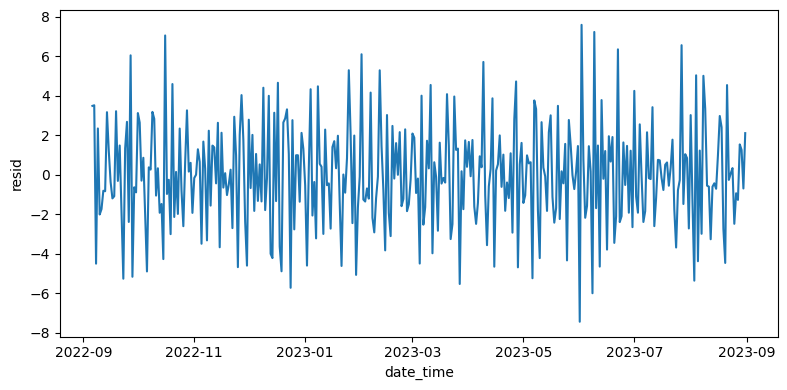

In [17]:
residual = decompose.resid

fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

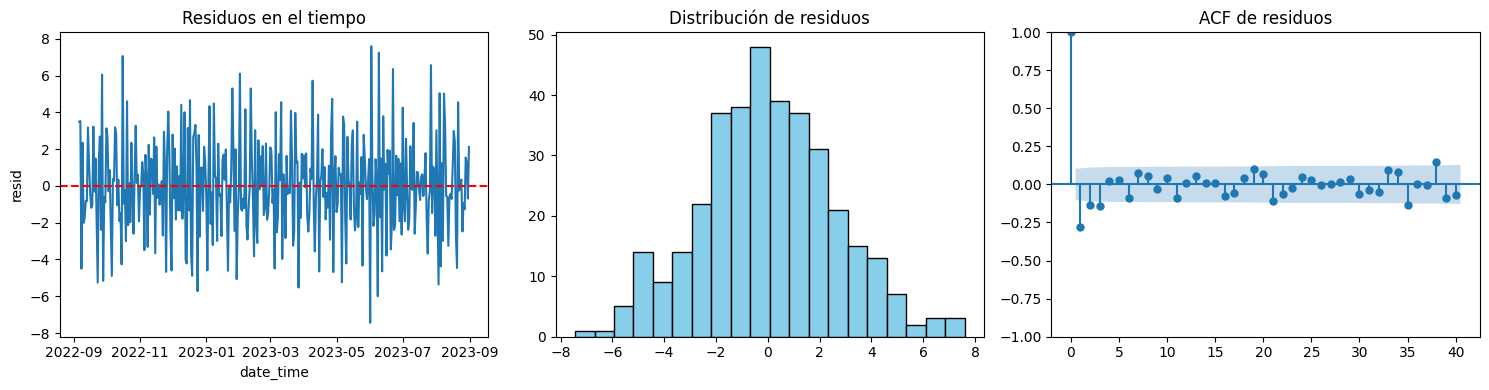

In [18]:


residual = decompose.resid.dropna()  # eliminar NaN

fig, axes = plt.subplots(1, 3, figsize=(15,4))

# 1. Serie temporal de residuos
sns.lineplot(data=residual, ax=axes[0])
axes[0].set_title("Residuos en el tiempo")
axes[0].axhline(0, color='red', linestyle='--')

# 2. Histograma de residuos
axes[1].hist(residual, bins=20, color='skyblue', edgecolor='black')
axes[1].set_title("Distribución de residuos")

# 3. Autocorrelación de residuos
plot_acf(residual, ax=axes[2], lags=40)
axes[2].set_title("ACF de residuos")

plt.tight_layout()
plt.show()


Interpretacion de la Variabilidad:

Según los dos primeros gráficos, los residuos aparentan comportarse como ruido blanco, ya que en el primero oscilan alrededor de cero y en el segundo muestran una distribución aproximadamente normal, aunque con algunos outliers leves.

Sin embargo, en el gráfico ACF de residuos cada barra representa la autocorrelación en un determinado rezago. La zona sombreada indica el rango dentro del cual la autocorrelación podría atribuirse al azar. En este caso, se observa que la segunda barra (lag 1) sobresale de manera más pronunciada, lo que evidencia dependencia temporal. Asimismo, la tercera (lag 2) y cuarta (lag 3) presentan una señal débil de autocorrelación.

En conclusión, los residuos no pueden considerarse completamente ruido blanco, ya que un verdadero ruido blanco debería tener todas las barras —excepto la primera, correspondiente al lag 0— dentro del intervalo de confianza, sin autocorrelaciones significativas.



**Paso 3: Entrena un Arima**


In [19]:
modelo = auto_arima(df_modif['sales'], seasonal=False,
                    stepwise=True,
                    trace=True)
print(modelo.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1843.162, Time=0.94 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2096.542, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1970.972, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1839.586, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2209.657, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1839.552, Time=0.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1841.532, Time=0.70 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1843.586, Time=0.29 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1839.607, Time=0.29 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1922.648, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.44 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 3.551 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  366
M

Interpretacion de la salida del modelo Arima:

Los parametros del mejor modelo Arima son: (p,d,q) =(1,1,1).

El modelo solamente aplico una diferenciacion (diff) d=1 para corregir la variabilidad enconcontrada en el punto anterior y lograr estacionariedad.

El intercept = 2.8110 (termino constante del modelo), es altamente significativo con un pvalue = 0.0000, lo que indica que realmente aporta al modelo.

El ma.L1 = -0.9413 (coeficiente de la parte media movil en lag 1, dado que se diferencio una vez). Es muy significativo por su pvalue = 0.0000, por lo tanto es el componente mas importante del modelo. Indica que el valor actual depende fuertemente del error del periodo anterior.

Ljung–Box (Q): Prob = 1.00, implica que no hay autocorrelacion en los residuos, es decir hay un buen ajuste.

Jarque–Bera (JB): Prob = 0.68, los residuos son aproximadamente normales.

Heteroskedasticity (H): Prob = 0.58, No hay evidencia de varianza cambiante.

En conclusion, los residuos cumplen las condiciones de ruido blanco y el modelo es valido.


**Paso 4: Predice con el conjunto de test**

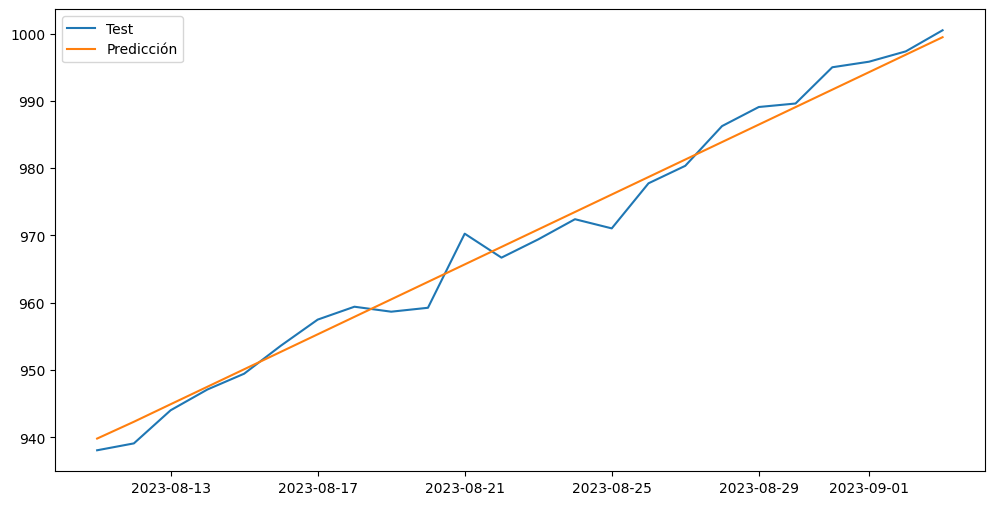

In [20]:
train = df_modif.iloc[:-24]  # Todo menos los últimos 24 dias
test = df_modif.iloc[-24:]   # Últimos 24 dias

modelo = auto_arima(train['sales'], seasonal=False, stepwise=True)
predicciones = modelo.predict(n_periods=len(test))

# Comparar visualmente
plt.figure(figsize=(12,6))
plt.plot(test.index, test['sales'], label="Test")
plt.plot(test.index, predicciones, label="Predicción")
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(test['sales'], predicciones))
print(f"RMSE: {rmse}")

RMSE: 2.255270034789724


In [22]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test['sales'], predicciones)

1.863314655112826

In [23]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test['sales'], predicciones)

0.0019231020102485452

Interpretacion:

En el grafico que observa la validacion entre el resultado del test y la prediccion, solamente para una fraccion de la serie de datos original (24 fechas en total).

Al calcularse los tres tipos de errores:

El RMSE significa que en promedio, el modelo ARIMA(1,1,1) predice las ventas con un error promedio de unas 2.25 unidades.

El MAE significa que el modelo ARIMA(1,1,1) predice las ventas con un error promedio de menos de 2 unidades por dia.

Tanto el RMSE y el MAE son erroes absolutos promedios, sin embargo el MAPE mide el error relativo en porcentaje respecto a los valores reales, por lo tanto es la metrica mas conveniente para auditar el modelo ARIMA(1,1,1).

Al obtener un MAPE de 0.19% se considera un error relativo muy bajo, lo que confirma que esas 2 unidades de errores antes senaladas, son insignificantes frente al tamano de las ventas.



**Conclusiones**

El modelo ARIMA(1,1,1) es adecuado para la serie de ventas, dado que explica bien la dinamina temporal, genera predicciones con errores minimos (menos del 0.2% en promedio), los residuos son cercanos a ruido blanco, lo que valida el ajuste, en pocas palabras es un modelo confiable para pronosticos a corto plazo.
